# Introduction

Living cells use enzymes to catalyse reactions to create desired products. Many of these reactions can be connected together to create metabolic pathways. These pathways can be connected together to form a complex network of interactions called a *metabolism*. The metabolism is central to to all life on Earth and can switch between *purposes* creating a challenging data analysis/visualisation problem.

I have included 5 wild-type (e.g. default) simulations of the full metabolism of a small human pathogen, Mycoplasma genitalium. Each simualtion contains a timeseries for all of the 645 reactions. Where the value is the *flux* through the reaction at time, *t*. The flux of a reaction is related to the *speed* of the production/consumption of the molecules in the given reaction i.e. large flux means lots of reaction and zero flux means no reaction.

In order to avoid getting bogged down in biological details I have not included information on the reactions nor the matrix that describes what reactions feed what reactions. This information is available on request but I suggest we see if we can figure out the important relationships  from the data.

I have two, related, questions:
1. Is there a good general visualisation(s) to inspect this metabolic data?
2. Using the visualisation(s) from 1. (or some other visualisation(s)) can we see *phases* within the cell cycle i.e. are certain pathways activated at certain times in the cells life?

# Visualising metabolic reaction fluxs of a bacteria

Using a compuataional model of a whole cell I have extracted the metabolic reactions fluxs. In short metabolic reactions fluxs represent the changing of one molecule into another where a higher flux corresponds to a, proportionaly, faster reaction rate.

Each simulation is stochastic and so 5 examples of a wild-type (i.e. default) simulations are included for comaparison.

In [1]:
# set inline plotting
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# load example 1
import pandas as pd
wt_metab_1 = pd.io.pickle.read_pickle('metabolic_reaction_fluxs_1.pickle')

In [3]:
# Each column is a reaction name and each index is what second of the cell's life. We can see that there are 645 reactions and 28,687 time steps.
print("Columns = ", wt_metab_1.columns)
print("Indexs = ", wt_metab_1.index)

Columns =  Index(['AHCYSs', 'Aas1', 'Aas2', 'Aas3', 'Aas4', 'Aas5', 'Aas6', 'Aas7',
       'AceE', 'AckA',
       ...
       'glycosyltransferase_PG160_DAG160', 'glycosyltransferase_PG161_DAG161',
       'glycosyltransferase_PG181_DAG181', 'hydroxyl_radical_generation_1',
       'hydroxyl_radical_generation_2', 'pSERpp', 'pTHRpp', 'pTYRpp',
       'vinyl_chloride_activation_1', 'vinyl_chloride_activation_2'],
      dtype='object', length=645)
Indexs =  Float64Index([    0.0,     1.0,     2.0,     3.0,     4.0,     5.0,     6.0,
                  7.0,     8.0,     9.0,
              ...
              28677.0, 28678.0, 28679.0, 28680.0, 28681.0, 28682.0, 28683.0,
              28684.0, 28685.0, 28686.0],
             dtype='float64', length=28687)


In [4]:
# take a look at the first 5 rows
wt_metab_1.head()

,AHCYSs,Aas1,Aas2,Aas3,Aas4,Aas5,Aas6,Aas7,AceE,AckA,...,glycosyltransferase_PG160_DAG160,glycosyltransferase_PG161_DAG161,glycosyltransferase_PG181_DAG181,hydroxyl_radical_generation_1,hydroxyl_radical_generation_2,pSERpp,pTHRpp,pTYRpp,vinyl_chloride_activation_1,vinyl_chloride_activation_2
0.0,0.000000e+00,0.0,0.0,0.0,4.511658,3.48022,0.0,2.353296,5970.629775,5970.534057,...,0.187668,0.144538,0.095621,0.0,0.0,20.526196,37.170539,138.0,0.0,0.0
1.0,0.000000e+00,0.0,0.0,0.0,4.511658,3.48022,0.0,2.353296,5970.629775,5970.534057,...,0.187668,0.144538,0.095621,0.0,0.0,4.000000,2.000000,3.0,0.0,0.0
2.0,1.421023e-22,0.0,0.0,0.0,4.511658,3.48022,0.0,2.353296,5970.629775,5970.534057,...,0.187668,0.144538,0.095621,0.0,0.0,4.000000,2.000000,3.0,0.0,0.0
3.0,1.950352e-22,0.0,0.0,0.0,4.511658,3.48022,0.0,2.353296,5222.541070,5222.445352,...,0.187668,0.144538,0.095621,0.0,0.0,4.000000,2.000000,3.0,0.0,0.0
4.0,1.524784e-26,0.0,0.0,0.0,4.511658,3.48022,0.0,2.353296,3561.244345,3561.148627,...,0.187668,0.144538,0.095621,0.0,0.0,3.000000,2.000000,3.0,0.0,0.0


In [5]:
# look at a rough summary of the data. We can see that some reactions never get used so perhaps we can note the reation names and remove them from analysis?
wt_metab_1.describe()

,AHCYSs,Aas1,Aas2,Aas3,Aas4,Aas5,Aas6,Aas7,AceE,AckA,...,glycosyltransferase_PG160_DAG160,glycosyltransferase_PG161_DAG161,glycosyltransferase_PG181_DAG181,hydroxyl_radical_generation_1,hydroxyl_radical_generation_2,pSERpp,pTHRpp,pTYRpp,vinyl_chloride_activation_1,vinyl_chloride_activation_2
count,2.868700e+04,28687.0,28687.0,28687.0,28687.000000,28687.000000,28687.0,28687.000000,28687.000000,28687.000000,...,28687.000000,28687.000000,28687.000000,28687.0,28687.0,28687.000000,28687.000000,28687.000000,28687.0,28687.0
mean,6.008785e-01,0.0,0.0,0.0,5.988285,4.619267,0.0,3.123510,4157.718271,4157.591225,...,0.249090,0.191844,0.126917,0.0,0.0,0.030067,0.022839,0.019800,0.0,0.0
std,9.529509e-01,0.0,0.0,0.0,0.812916,0.627071,0.0,0.424020,1810.722701,1810.716227,...,0.033814,0.026043,0.017229,0.0,0.0,0.215759,0.263563,0.825725,0.0,0.0
min,0.000000e+00,0.0,0.0,0.0,4.511658,3.480220,0.0,2.353296,174.469691,174.345655,...,0.187668,0.144538,0.095621,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000e+00,0.0,0.0,0.0,5.285847,4.077418,0.0,2.757116,2768.904210,2768.773377,...,0.219871,0.169341,0.112030,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,3.811961e-27,0.0,0.0,0.0,5.873164,4.530464,0.0,3.063463,3692.988778,3692.880600,...,0.244301,0.188156,0.124478,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000e+00,0.0,0.0,0.0,6.807531,5.251220,0.0,3.550832,5249.975776,5249.866182,...,0.283167,0.218090,0.144281,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
max,8.000000e+00,0.0,0.0,0.0,7.207974,5.560115,0.0,3.759704,9555.736345,9555.585122,...,0.299824,0.230919,0.152768,0.0,0.0,20.526196,37.170539,138.000000,0.0,0.0


In [6]:
# columns and indexs can be called by name
example_name = wt_metab_1.columns[5]
print("Example name is: ", example_name)
print("Get data for example_name:", wt_metab_1.loc[5:13, example_name])

Example name is:  Aas5
Get data for example_name: 5.0     3.48022
6.0     3.48022
7.0     3.48022
8.0     3.48022
9.0     3.48022
10.0    3.48022
11.0    3.48022
12.0    3.48022
13.0    3.48022
Name: Aas5, dtype: float64


In [7]:
# or by number (note index name and index number are the same in this case)
print("Get data for the fith column:", wt_metab_1.iloc[5:13, [5]])

Get data for the fith column:          Aas5
5.0   3.48022
6.0   3.48022
7.0   3.48022
8.0   3.48022
9.0   3.48022
10.0  3.48022
11.0  3.48022
12.0  3.48022


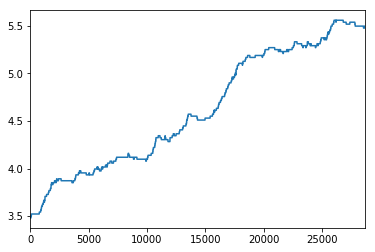

In [12]:
# let's take a look at one of the time series
wt_metab_1.loc[:, example_name].plot()

In [9]:
# lets take all the zero data out
list_of_non_activate_reactions = wt_metab_1.columns[(wt_metab_1!=0).all(axis=0)].tolist()
active_reactions = wt_metab_1[wt_metab_1.columns[(wt_metab_1!=0).all(axis=0)]]
print(wt_metab_1.shape)
print(active_reactions.shape)
active_reactions.describe()

(28687, 645)
(28687, 196)


,Aas4,Aas5,Aas7,AceE,AckA,Adk1,Adk2,Adk3,Apt,Apts_Ala,...,Tkt1,Tkt2,Tmk,TpiA,TrxB,Udk1,Udk2,glycosyltransferase_PG160_DAG160,glycosyltransferase_PG161_DAG161,glycosyltransferase_PG181_DAG181
count,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,...,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000,28687.000000
mean,5.988285,4.619267,3.123510,4157.718271,4157.591225,28605.013009,24131.797937,-51828.827056,12.882895,13.949032,...,-7.823287,-7.823287,15.120121,2082.193832,127.895041,9.379323,15.560308,0.249090,0.191844,0.126917
std,0.812916,0.627071,0.424020,1810.722701,1810.716227,6852.588492,4324.556425,10580.033655,7.496460,1.893597,...,3.275635,3.275635,2.052573,915.355259,127.887134,1.307027,3.715898,0.033814,0.026043,0.017229
min,4.511658,3.480220,2.353296,174.469691,174.345655,22709.705896,12081.319782,-80611.860299,7.421116,10.509396,...,-19.817479,-19.817479,11.391710,-51.493975,5.284566,6.025015,10.022064,0.187668,0.144538,0.095621
25%,5.285847,4.077418,2.757116,2768.904210,2768.773377,23719.026158,21012.973092,-56189.086168,8.738473,12.312783,...,-8.986599,-8.986599,13.346501,1386.299623,8.036292,8.290146,12.321383,0.219871,0.169341,0.112030
50%,5.873164,4.530464,3.063463,3692.988778,3692.880600,25737.666682,23819.891102,-48968.267771,10.407127,13.680870,...,-6.786629,-6.786629,14.829446,1858.905208,150.056751,9.136079,15.122049,0.244301,0.188156,0.124478
75%,6.807531,5.251220,3.550832,5249.975776,5249.866182,30279.607861,26975.238704,-43766.784890,11.461013,15.857372,...,-5.571902,-5.571902,17.188676,2633.952038,197.076063,10.785649,18.088484,0.283167,0.218090,0.144281
max,7.207974,5.560115,3.759704,9555.736345,9555.585122,45419.411791,35725.938540,-33493.964138,41.476093,16.790159,...,-4.462803,-4.462803,18.199774,6395.331926,406.547950,11.420099,24.124666,0.299824,0.230919,0.152768


One can see that although we have significantly reduced the nuumber of reactions this is still going to be very hard to visualise. 

The network which describes what reaction effects another is available upon request, however in order to avoid this getting very biological I suggest we try to do without this and see if we can discover interesting relationships between reactions. It's worth noting that realtionships and distributions may change throughout the cell cycle.

**Questions**
1. Is there a good general visualisation(s) to inspect this matabolic data?
2. Using the visualisation(s) from 1. (or some other visualisation(s)) can we see *phases* within the cell cycle.

**Suggestions from the author**

There are currently just under 200 different reactions interacting in ways we don't understand which makes it very hard to visualise. Reducing the amount of data to a more managable amount seems like an obvious first step.
1. Dimension reduction. We can use dimension reduction techniques to view only the time series that cause the most variance.
2. Cluster related time series. We can group related time series to cut down the number to view. For example one could use look at a pearson correlation matrix to group time series on either the whole-cell cycle time frame or smaller subsets (see 3.).
3. Whether the distributions of each time series is *stationary* or not will effect how we visualise them so an initial visualisation of that that might be very useful.

In [10]:
# an attempt to get an idea of what all the reactions look like I create a function trys to group time series together that are similar. This is done by assuming that similar timeseries will have standard deviations within half an order of magnitude of each other whilst avoiding putting more than five time series on one plot. 
import math
def dataOverview(data_frame, save_name = None, no_of_lines_in_plot = 5, order_of_magnitude_change_limit = 0.5):
    """This prints all the data in the data frame but organises it so that time series that of a similar order of magnitude are on the same plot but also so there's not too many time series on one plot. Basically view all the data in as fewer plots as possible."""
    # the order of magnitude of timeseries can vary greatly and so time series should be grouped with other times of a similar order of magnitude. I found means, maxs or mins to give misleading results and found that STD did a reasonable job.
    # reorder dataframe columns so that those with the largest STD are first and the smallest last
    data_ordered = data_frame.reindex_axis(data_frame.apply(lambda x: x.std()).sort_values(ascending = False).index, axis=1)

    # make split into managable amounts of figures
    figure_counter = 1
    series_counter = 1
    next_series_counter = series_counter + 2
    stop_flag = False
    while stop_flag == False:
        tmp_difference = abs((math.log10(data_ordered.iloc[:, series_counter].std()) - math.log10(data_ordered.iloc[:, next_series_counter].std())))
        print("tmp_difference = ", tmp_difference)
        if (tmp_difference > order_of_magnitude_change_limit or abs(next_series_counter - series_counter) > no_of_lines_in_plot):
            data_ordered.iloc[:, series_counter:(next_series_counter - 1)].plot()
            if save_name != None:
                plt.savefig(save_name + str(figure_counter) + '.pdf')
                plt.close()
            else:
                plt.show()
            series_counter = next_series_counter
            next_series_counter += 2
            figure_counter += 1
        else:
            next_series_counter += 1

        if (series_counter == len(data_ordered.columns) -1 or next_series_counter == len(data_ordered.columns) - 1):
            stop_flag = True

tmp_difference =  0.8708601222428181


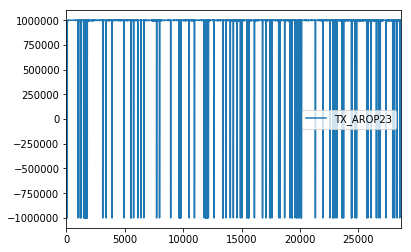

tmp_difference =  0.011267910244826318
tmp_difference =  0.011704286119891272
tmp_difference =  0.031602670201444916
tmp_difference =  0.0316073246179327
tmp_difference =  0.3942258339567344


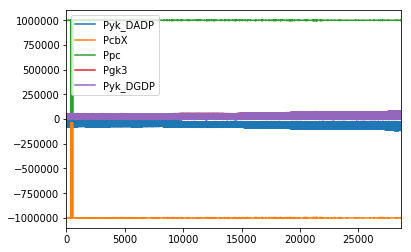

tmp_difference =  0.07679574265323375
tmp_difference =  0.2654281392398614
tmp_difference =  0.46534122386178645
tmp_difference =  0.4860705293723493
tmp_difference =  0.5440812979969261


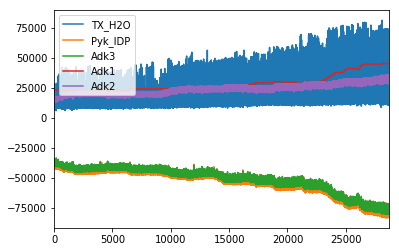

tmp_difference =  0.005375228563787804
tmp_difference =  0.10222432208677557
tmp_difference =  0.15245040386522302
tmp_difference =  0.15443271652371715
tmp_difference =  0.2229221115290141


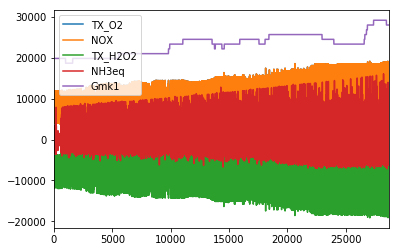

tmp_difference =  0.06488644909040531
tmp_difference =  0.06802307753346382
tmp_difference =  0.06806320434603608
tmp_difference =  0.06821402609172456
tmp_difference =  0.0718075393681894


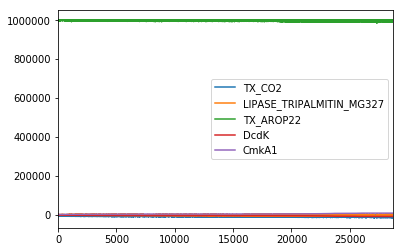

tmp_difference =  0.0
tmp_difference =  0.004619896472641383
tmp_difference =  0.004621449317000259
tmp_difference =  0.004621449317000259
tmp_difference =  0.004621449317000259


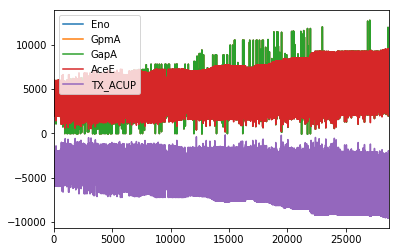

tmp_difference =  0.19542410293170276
tmp_difference =  0.23707918579176646
tmp_difference =  0.28164883575123856
tmp_difference =  0.29584986825811477
tmp_difference =  0.2962607125070713


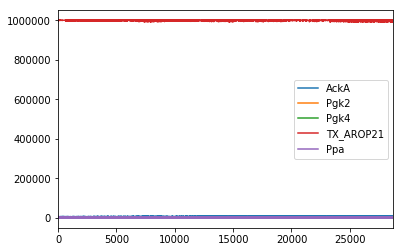

tmp_difference =  0.05739093964731046
tmp_difference =  0.12196100143218036
tmp_difference =  0.24249967574594766
tmp_difference =  0.26876007497996435
tmp_difference =  0.48392885453965784


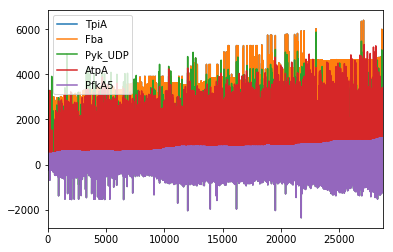

tmp_difference =  0.08843234932627153
tmp_difference =  0.0894018380221886
tmp_difference =  0.3575002230273121
tmp_difference =  0.3575165021535671
tmp_difference =  0.35752852729271556


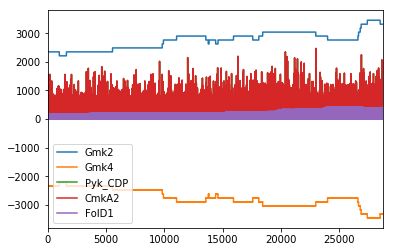

tmp_difference =  0.0573218905889159
tmp_difference =  0.05804496917581714
tmp_difference =  0.7940511406062105


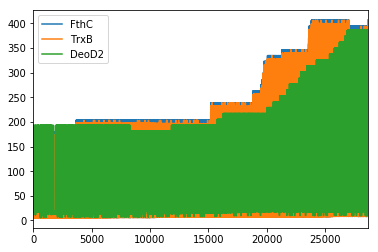

tmp_difference =  0.28542355910732664
tmp_difference =  0.28542355910732664
tmp_difference =  0.3336644346985821
tmp_difference =  0.3783872000376518
tmp_difference =  0.4512249501709379


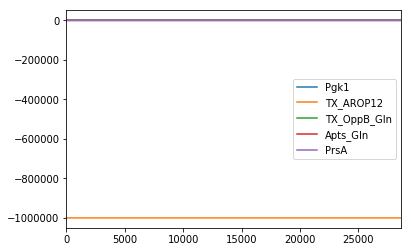

tmp_difference =  0.05853074358332544
tmp_difference =  0.13278091858067764
tmp_difference =  0.1713081085510001
tmp_difference =  0.21532306009416835
tmp_difference =  0.24809908307608308


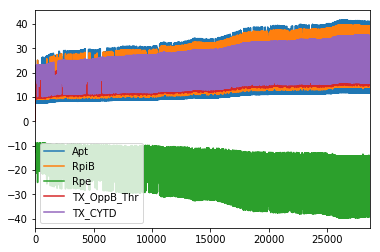

tmp_difference =  0.055019514209557974
tmp_difference =  0.056693294803248584
tmp_difference =  0.0658001882702105
tmp_difference =  0.0658001882702105
tmp_difference =  0.0658001882702105


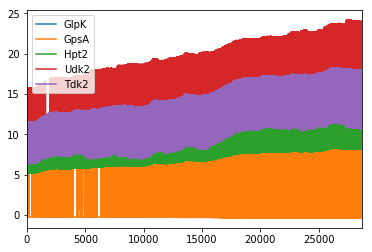

tmp_difference =  0.04566146790101311
tmp_difference =  0.04566146790101311
tmp_difference =  0.04566146790101311
tmp_difference =  0.06403438751875778
tmp_difference =  0.06403438751875778


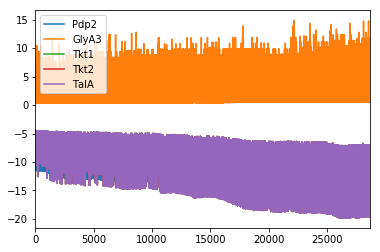

tmp_difference =  0.08653902540413982
tmp_difference =  0.08653902540413982
tmp_difference =  0.1599262310460854
tmp_difference =  0.1599262310460854
tmp_difference =  0.16498781478756253


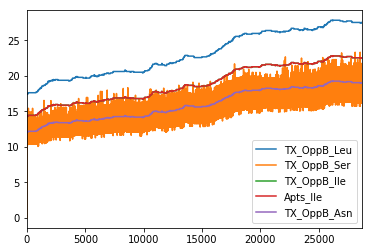

tmp_difference =  0.015607394974331057
tmp_difference =  0.019636028856248156
tmp_difference =  0.019636028856248267
tmp_difference =  0.03750820285337325
tmp_difference =  0.05464723084216311


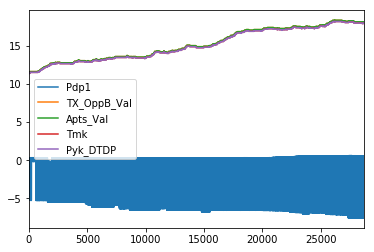

tmp_difference =  0.0020285188695516876
tmp_difference =  0.05336875794698778
tmp_difference =  0.08346958299593132
tmp_difference =  0.16100289502188903
tmp_difference =  0.17871811897529732


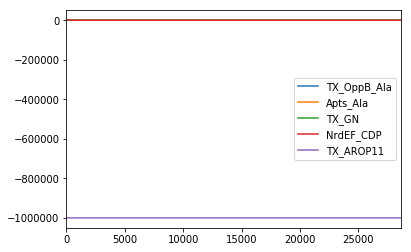

tmp_difference =  0.07919959116564679
tmp_difference =  0.13114912618812546
tmp_difference =  0.13321544180029465
tmp_difference =  0.1332154418002947
tmp_difference =  0.18852347517233728


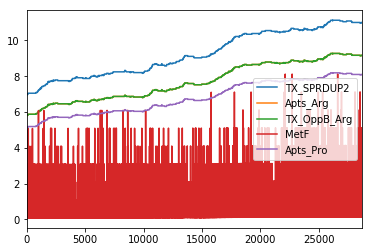

tmp_difference =  0.06303543526888541
tmp_difference =  0.06303543526888541
tmp_difference =  0.1127294296065299
tmp_difference =  0.1127294296065299
tmp_difference =  0.20448017078529465


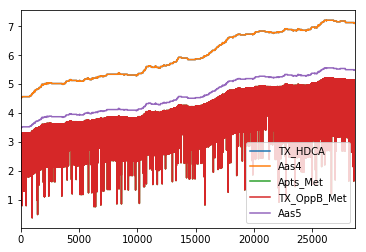

tmp_difference =  0.04169378567526577
tmp_difference =  0.07817937135069081
tmp_difference =  0.07817937135069092
tmp_difference =  0.09654982487868663
tmp_difference =  0.09654982487868663


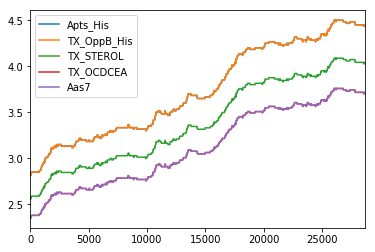

tmp_difference =  0.0
tmp_difference =  0.06685804782810578
tmp_difference =  0.0668580478281059
tmp_difference =  0.11272942960652987
tmp_difference =  0.11272942960652987


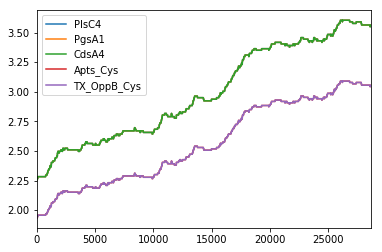

tmp_difference =  1.1102230246251565e-16
tmp_difference =  0.07146715194622644
tmp_difference =  0.09084084444376994
tmp_difference =  0.16004748288612836
tmp_difference =  0.16993011252945567


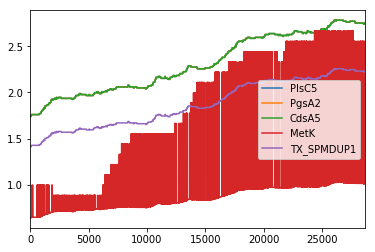

tmp_difference =  0.0
tmp_difference =  0.0
tmp_difference =  0.12594612356770307
tmp_difference =  0.2511918482112272
tmp_difference =  0.2619167391777615


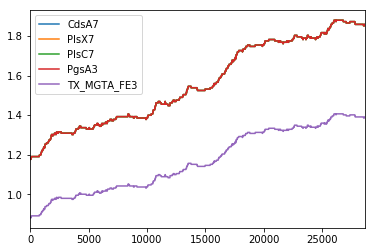

tmp_difference =  0.09260925813241738
tmp_difference =  0.09260925813241738
tmp_difference =  0.09260925813241738
tmp_difference =  0.10193094843065498
tmp_difference =  0.27684249989834187


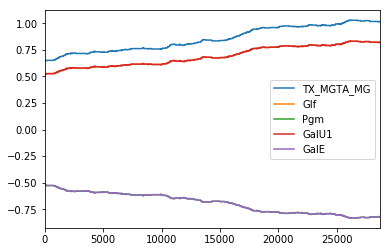

tmp_difference =  0.06121323262555345
tmp_difference =  0.06767024419404732
tmp_difference =  0.06767024419404732
tmp_difference =  0.10249279356593255
tmp_difference =  0.13508317992590402


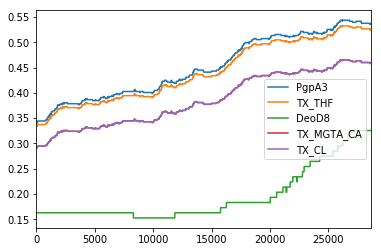

tmp_difference =  0.023711131772616634
tmp_difference =  0.049115844779409334
tmp_difference =  0.05082677564228133
tmp_difference =  0.1086793146597651
tmp_difference =  0.1086793146597651


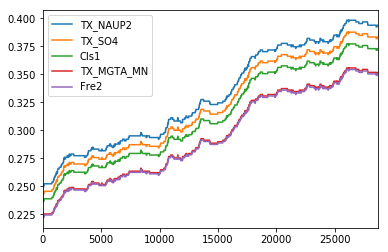

tmp_difference =  0.0
tmp_difference =  0.014735392570901507
tmp_difference =  0.02738962793650579
tmp_difference =  0.10300929021505412
tmp_difference =  0.10301144901420023


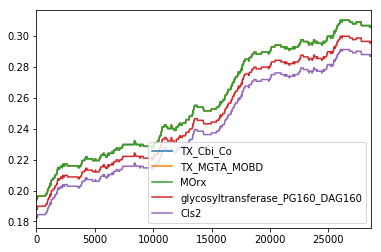

tmp_difference =  0.025130568385143937
tmp_difference =  0.09751203272564979
tmp_difference =  0.16966053866131836
tmp_difference =  0.20455844963870695
tmp_difference =  0.3010278368648349


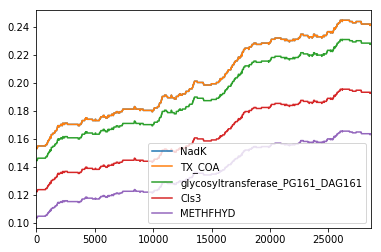

tmp_difference =  2.220446049250313e-16
tmp_difference =  2.220446049250313e-16
tmp_difference =  2.220446049250313e-16
tmp_difference =  2.220446049250313e-16
tmp_difference =  0.1394567047825528


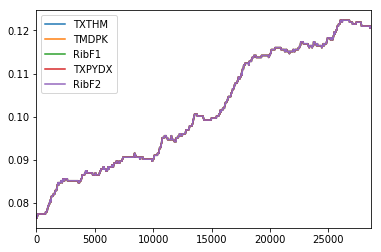

tmp_difference =  0.29898578422112543


ValueError: math domain error

In [11]:
dataOverview(active_reactions)

Whilst this is not the perfect way to group them we can see that there is a very wide range of behaviours. Some are very similar or correlate/anti-correlate strongly whilst others appear to have partial or no correlation. Some reaction fluxs stay roughly the same whilst others grow or shrink. Needless to say that there are many way we can look at or group this data. 

I will obviously be working on this and would love to work in a team. Obviously if you want to work on your own or in other groups that's great too. I will be available to discuss anything with anyone. Enjoy!